In [3]:
% matplotlib inline

import numpy as np
import numpy.ma as ma
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio
from mpl_toolkits.basemap import Basemap, cm
import seawater as sw

import MITgcmutils as mit
from MITgcmutils import cs

from matplotlib import rcParams, rc
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})


In [4]:
# import surface nitrate data

nit = np.zeros((365, 160, 360))

for i in range(1, 366, 1):

    tmp = np.fromfile('/Volumes/My Passport/coarse_run/extract/NutsZoo/NutsZoo.1999.%04d.data' % i, '>f').reshape(21, 23, 160, 360)
    tmp = tmp[1,0, :,:]
    nit[i-1,:,:] = tmp

    del tmp

In [5]:
# get monthly averages

monthly=np.zeros((12, 160, 360))
days=[0,31,28,31,30,31,30,31,31,30,31,30,31]
startday=(np.cumsum(days)+1)[0:12]
endday=np.cumsum(days)[1:13]

for m in range(12):
    beg = startday[m]-1
    fin = endday[m]-1
    tmp = nit[beg:fin,:,:]

    monthly[m,:,:] = np.nanmean(tmp, 0)
    del tmp

#monthly.astype('>f4').tofile('/Users/sclayton/Google Drive/work/comparison/data/monthly/CR/nit.monthly.1999.data')       

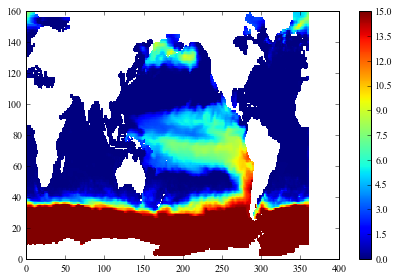

In [7]:
HFCR = np.fromfile('/Users/sclayton/Documents/darwin_model/eg_grid/HFacC.data', dtype = '>f')
HFCR = HFCR.reshape(23, 160, 360)[2,:,:]

mld_mask = ma.masked_where(HFCR == 0, monthly[6,:,:], copy=False)
plt.pcolor(mld_mask, shading = 'flat', vmin = 0, vmax = 15)
plt.colorbar()
plt.show()


In [ ]:
mld_mask = ma.masked_where(HFCR == 0, monthly[11,:,:], copy=False)
plt.pcolor(mld_mask, shading = 'flat', vmin = 0, vmax = 15)
plt.colorbar()
plt.show()